In [ ]:
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import numpy as np
import pandas as pd 
import os
image_dir = "/content/UTKFace/"
train_x = []
train_y = []

filename = []
gender=[]
race=[]
age=[]

for file in tqdm(os.listdir(image_dir),position=0,leave=True):
#     print(file)
#     img = cv2.imread(image_dir+file,0)
#     img = cv2.resize(img,(100,100))
#     img = img/255
    labels = file[:len(file)-13].split("_")
#     print(file)
#      = file
    if(len(labels)==4):
        filename.append(image_dir+file)
        gender.append(labels[1])
        race.append(labels[2])
        age.append(str((min(80,int(labels[0]))-min(80,int(labels[0]))%10)/10))
# train_x = np.array(train_x)
# train_y = np.array(train_y)
# train_x = train_x.reshape(23705,100,100,1)
# train_y = train_y.reshape(23705,3)

100%|██████████| 23708/23708 [00:00<00:00, 430814.98it/s]


In [ ]:
data = pd.DataFrame(data=filename,columns=['filename'])
data['gender'] = gender
data['race'] = race
data['age'] = age
data['age']

0        2.0
1        1.0
2        2.0
3        3.0
4        3.0
        ... 
23700    3.0
23701    2.0
23702    2.0
23703    0.0
23704    3.0
Name: age, Length: 23705, dtype: object

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()


# lb.transform([1, 6])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
image_width, image_height = 200,200
nb_train_samples = 16600
nb_validation_samples = 7105
epochs = 20
batch_size = 64
train_datagen = ImageDataGenerator(
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    )

test_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_dataframe(
    data.iloc[:16600],
    directory=image_dir,
    x_col='filename',
    y_col='gender',
    shuffle=False,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_dataframe(
    data.iloc[16600:],
    directory=image_dir,
    x_col='filename',
    y_col='gender',
    shuffle=False,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary')

Found 16600 validated image filenames belonging to 2 classes.
Found 7105 validated image filenames belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout



pretrained = keras.applications.VGG16(include_top=False,weights='imagenet',input_shape=(image_width,image_height,3))
# pretrained.summary()
for layer in pretrained.layers[-4:]:
    layer.trainable = False
# for layer in pretrained.layers:
# #     layer.trainable = False
#     print(layer,layer.trainable)
model = Sequential()
model.add(pretrained)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(4096, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples/batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples/batch_size,
#     batch_size=1,
    verbose=1)

58892288/58889256 [==============================] - 0s 0us/step
Epoch 1/20
259/259 [==============================] - 249s 915ms/step - loss: 0.6703 - accuracy: 0.5887 - val_loss: 0.3757 - val_accuracy: 0.8315
Epoch 2/20
259/259 [==============================] - 233s 896ms/step - loss: 0.4173 - accuracy: 0.8105 - val_loss: 0.2749 - val_accuracy: 0.8805
Epoch 3/20
259/259 [==============================] - 230s 887ms/step - loss: 0.3122 - accuracy: 0.8650 - val_loss: 0.2542 - val_accuracy: 0.8915
Epoch 4/20
259/259 [==============================] - 229s 882ms/step - loss: 0.2637 - accuracy: 0.8870 - val_loss: 0.2470 - val_accuracy: 0.8937
Epoch 5/20
259/259 [==============================] - 229s 882ms/step - loss: 0.2574 - accuracy: 0.8950 - val_loss: 0.1961 - val_accuracy: 0.9172
Epoch 6/20
259/259 [==============================] - 229s 880ms/step - loss: 0.2222 - accuracy: 0.9090 - val_loss: 0.1829 - val_accuracy: 0.9237
Epoch 7/20
259/259 [==============================] - 229s 

In [ ]:
model.save("model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

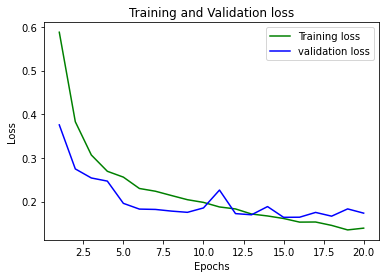

In [ ]:
loss_train = history.history['loss']
# loss_train = history.history['train_loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

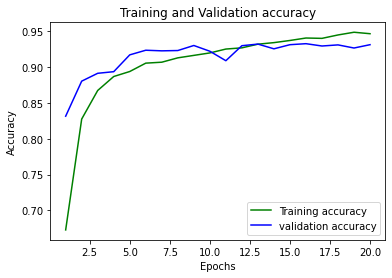

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()